# churn_rate_prediction - SVM

## Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('churn_rate_prediction.csv')
df.shape

(36992, 25)

In [2]:
# Check tong quan bo du lieu
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [3]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


## Data Analysis

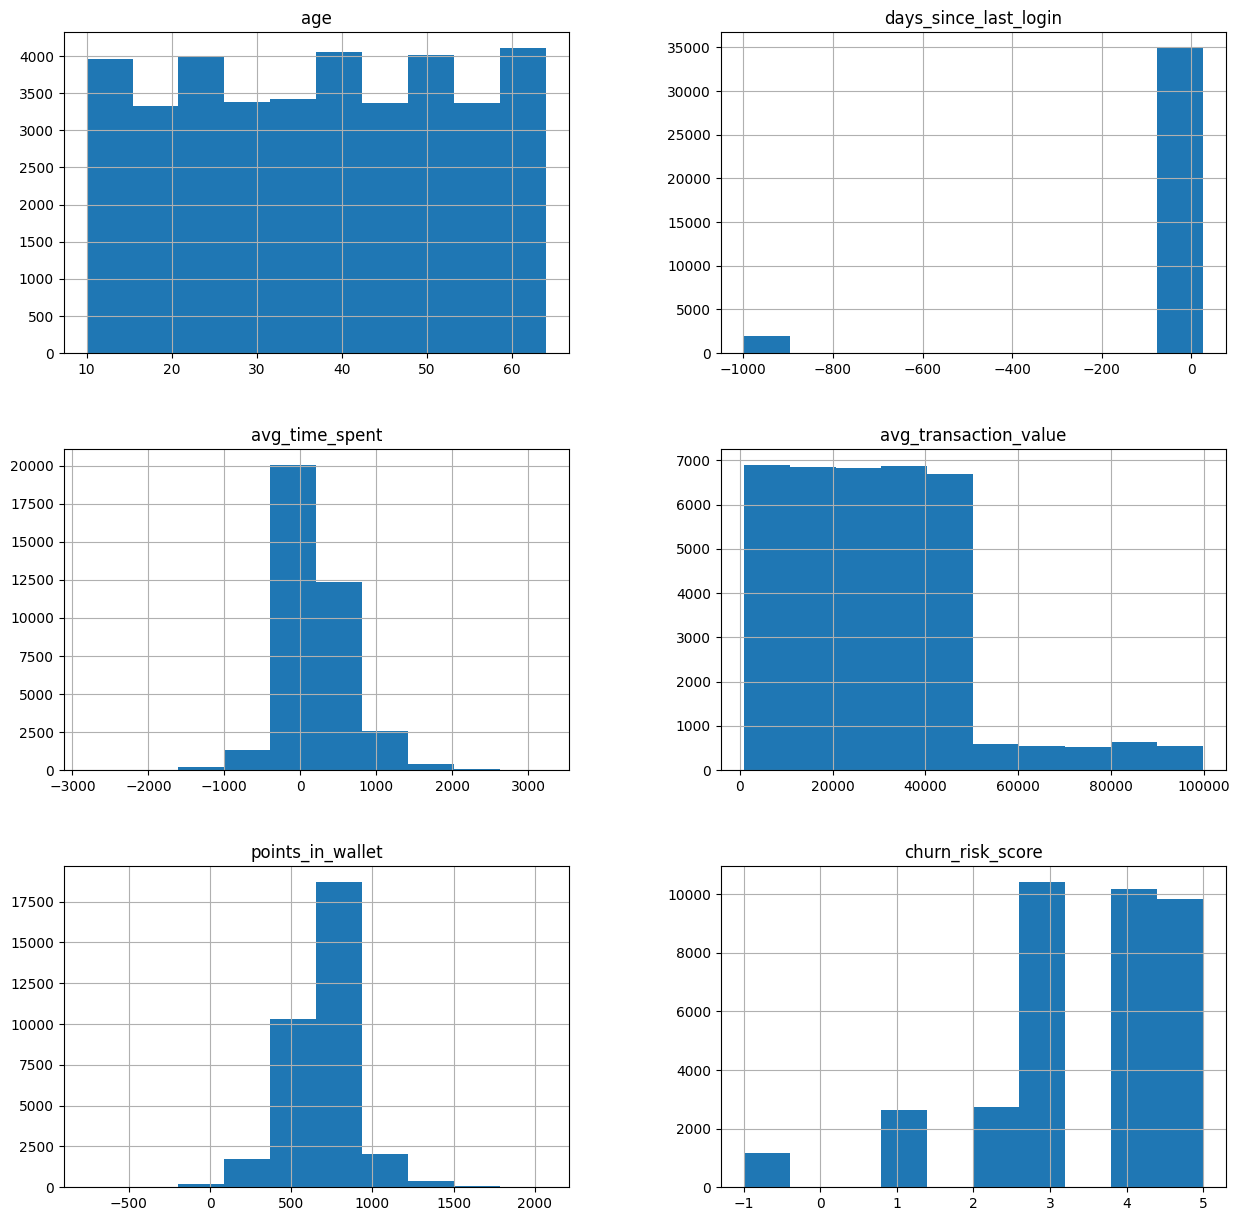

In [4]:
df.hist(figsize=(15, 15))
plt.show()

## Data Preprocessing

In [5]:
# Lay cac cot categorical
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature != 'y'))]
categorical_features

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

Xem qua bộ dữ liệu bao gồm những giá trị gì và số lượng

In [6]:
for values in categorical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

customer_id : 36992
Name : 36992
gender : ['F' 'M' 'Unknown'] 3
security_no : 36992
region_category : ['Village' 'City' 'Town' nan] 4
membership_category : ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] 6
joining_date : 1096
joined_through_referral : ['No' '?' 'Yes'] 3
referral_id : 11359
preferred_offer_types : ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan] 4
medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both'] 4
internet_option : ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic'] 3
last_visit_time : 30101
avg_frequency_login_days : 1654
used_special_discount : ['Yes' 'No'] 2
offer_application_preference : ['Yes' 'No'] 2
past_complaint : ['No' 'Yes'] 2
complaint_status : ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available'] 5
feedback : 9


Các giá trị bị thiếu như: 'Unknown', nan, '?'

In [7]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
numerical_features

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

In [8]:
for values in numerical_features:
    if(len(df[values].unique()) < 7):
        print(values,':',df[values].unique(), len(df[values].unique()))
    else:
        print(values, ':', len(df[values].unique()))

age : 55
days_since_last_login : 27
avg_time_spent : 25961
avg_transaction_value : 36894
points_in_wallet : 23700
churn_risk_score : [ 2  1  5  3  4 -1] 6


Các cột cần quan tâm đến vì có những giá trị bất thường

In [9]:
df[numerical_features].isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64

### 'customer_id', 'Name', 'security_no'

In [10]:
df.drop(['customer_id','Name','security_no'], axis=1, inplace=True)
df.shape

(36992, 22)

### gender

In [11]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [12]:
df['gender'] = df['gender'].replace('Unknown','M')
df['gender'].value_counts()

gender
M    18502
F    18490
Name: count, dtype: int64

### region_category - nan

In [13]:
df['region_category'].value_counts()


region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [14]:
unique_values = df['region_category'].unique()
print(unique_values)

['Village' 'City' 'Town' nan]


In [15]:
df['region_category'].isnull().sum()

5428

In [16]:
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

### joining_date

In [17]:
df['joining_date'].value_counts()

joining_date
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2016-03-16    19
2016-06-03    18
2015-09-12    18
2017-07-03    18
2015-03-04    16
Name: count, Length: 1096, dtype: int64

In [18]:
df['joining_date'] = pd.to_datetime(df['joining_date'])
df['days_since_joined'] = df['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
df.drop(['joining_date'], inplace=True, axis=1)

### Chỉnh sửa dữ liệu = '?' của cột 'joined_through_referral' 
 + Nếu referral_id != 'xxxxxxxx' thì joined_through_referral = Yes
 
 + Nếu referral_id == 'xxxxxxxx' thì joined_through_referral = No

In [19]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [20]:
df.loc[df['joined_through_referral'] == '?', 'joined_through_referral'] = df.loc[df['joined_through_referral'] == '?', 'referral_id'].apply(lambda x: 'No' if x == 'xxxxxxxx' else 'Yes')

### referral_id - drop

In [21]:
df['referral_id'].value_counts()

referral_id
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: count, Length: 11359, dtype: int64

In [22]:
df.drop('referral_id', axis=1, inplace=True)

### preferred_offer_type - nan

In [23]:
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [24]:
df['preferred_offer_types'].isnull().sum()

288

In [25]:
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

### medium_of_operation - '?'

In [26]:
# Thống kê crosstab giữa 'medium_of_operation' và 'internet_option'
crosstab_result = pd.crosstab(df['medium_of_operation'], df['internet_option'])
print(crosstab_result)

internet_option      Fiber_Optic  Mobile_Data  Wi-Fi
medium_of_operation                                 
?                           1741         1849   1803
Both                        1252         1262   1296
Desktop                     4572         4625   4716
Smartphone                  4671         4607   4598


Ta thấy giữa internet_option và medium_of_operation không thể hiện logic nào. Nên sử dụng phương pháp thay thế '?' bằng ngẫu nhiên 'Desktop', 'Both', 'Smartphone'theo tỷ lệ mà bộ dữ liệu đang có

In [27]:
#Tỉ lệ các giá trị thay thế
proportions = [1252, 4572, 4671]
values = ['Desktop', 'Both', 'Smartphone']

# Thay thế giá trị '?' bằng các giá trị ngẫu nhiên theo tỷ lệ
replacements = np.random.choice(values, size=df['medium_of_operation'].eq('?').sum(), p=proportions/np.sum(proportions))
df.loc[df['medium_of_operation'] == '?', 'medium_of_operation'] = replacements

### last_visit_time

In [28]:
from datetime import datetime
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S")
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    return total_seconds
df["last_visit_time"] = df["last_visit_time"].apply(time_to_seconds).fillna(0).astype(int)

### avg_frequency_login_days - Error

In [29]:
# thay thế Error = nan
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan).astype(float)
df['avg_frequency_login_days'].describe()

count    33470.000000
mean        15.976715
std          9.215858
min        -43.652702
25%          9.000000
50%         16.000000
75%         23.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

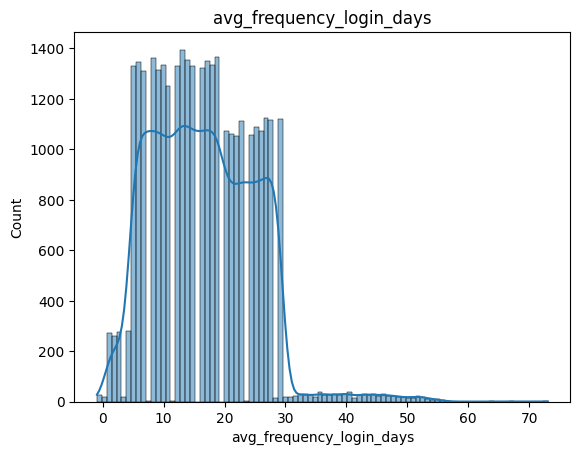

In [30]:
data = df.loc[df['avg_frequency_login_days'] > -1]['avg_frequency_login_days']
sns.histplot(data, kde=True)
plt.xlabel('avg_frequency_login_days')
plt.ylabel('Count')
plt.title('avg_frequency_login_days')
plt.show()

Đồ thị bị lệch ==> Thay thế bằng median_value 

In [31]:
median_value = df.loc[df['avg_frequency_login_days'] >= 0, 'avg_frequency_login_days'].median()
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].mask(df['avg_frequency_login_days'] < 0, median_value)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(median_value)

### days_since_last_login 

In [32]:
df.loc[df['days_since_last_login'] < 0].value_counts()

age  gender  region_category  membership_category  joined_through_referral  preferred_offer_types     medium_of_operation  internet_option  last_visit_time  days_since_last_login  avg_time_spent  avg_transaction_value  avg_frequency_login_days  points_in_wallet  used_special_discount  offer_application_preference  past_complaint  complaint_status          feedback                  churn_risk_score  days_since_joined
10   F       City             Gold Membership      No                       Gift Vouchers/Coupons     Both                 Wi-Fi            40715            -999                    327.860000     21782.83               7.00000                   774.480000        Yes                    Yes                           No              Not Applicable            Poor Customer Service     3                 2413                 1
47   F       Town             Silver Membership    Yes                      Without Offers            Desktop              Fiber_Optic      73257          

Xét trên tập dữ liệu 'days_since_last_login' = -999
        
         Ta có thể thấy giá trị -999 chiếm 1999 dòng, đồng thời ứng với mỗi dòng dữ liệu đều tồn tại giá trị tại các cột như 'last_visit_time','avg_time_spent',... Nên ta có thể khẳng định đây không phải giá trị đại diện cho việc khách hàng chưa đăng nhập lần nào. Mà có thể các giá trị này là các giá trị bị thiếu (missing values)

In [33]:
mean_value = df.loc[df['days_since_last_login'] > -1]['days_since_last_login'].mean()
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, mean_value)

### avg_time_spent

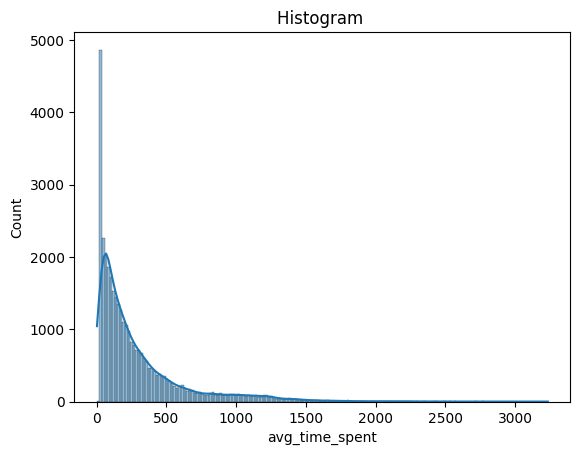

In [34]:
sns.histplot( df.loc[df['avg_time_spent']>=0]['avg_time_spent'], kde=True)
plt.xlabel('avg_time_spent')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()


Nhận xét:  dữ liệu chứa các giá trị ngoại lệ (outliers) và phân phối dữ liệu lệch.


==> Sử dụng median() thay thế

In [35]:
median_value = df.loc[df['avg_time_spent'] >= 0, 'avg_time_spent'].median()
df['avg_time_spent'] = df['avg_time_spent'].mask(df['avg_time_spent'] < 0, median_value)

### points_in_wallet

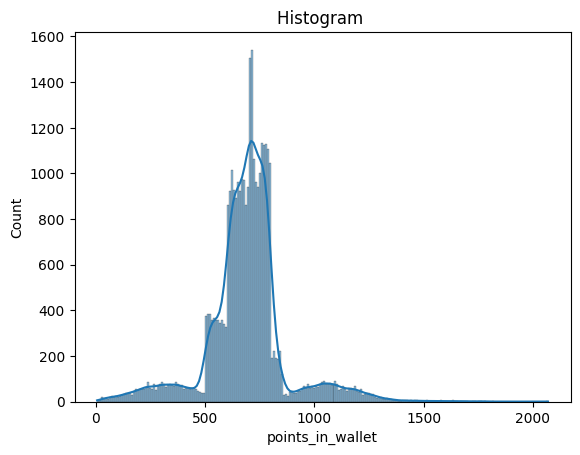

In [36]:
sns.histplot( df.loc[df['points_in_wallet']>=0]['points_in_wallet'], kde=True)
plt.xlabel('points_in_wallet')
plt.ylabel('Count')
plt.title('Histogram ')
plt.show()

3443 dòng có giá trị NaN

In [37]:
median_value = df.loc[df['points_in_wallet'] >= 0, 'points_in_wallet'].median()
df['points_in_wallet'] = df['points_in_wallet'].mask(df['points_in_wallet'] < 0, median_value)
df['points_in_wallet'] = df['points_in_wallet'].fillna(median_value)

### churn_risk_score

In [38]:
df['churn_risk_score']=df['churn_risk_score'].replace(-1, 1)

### Outlier

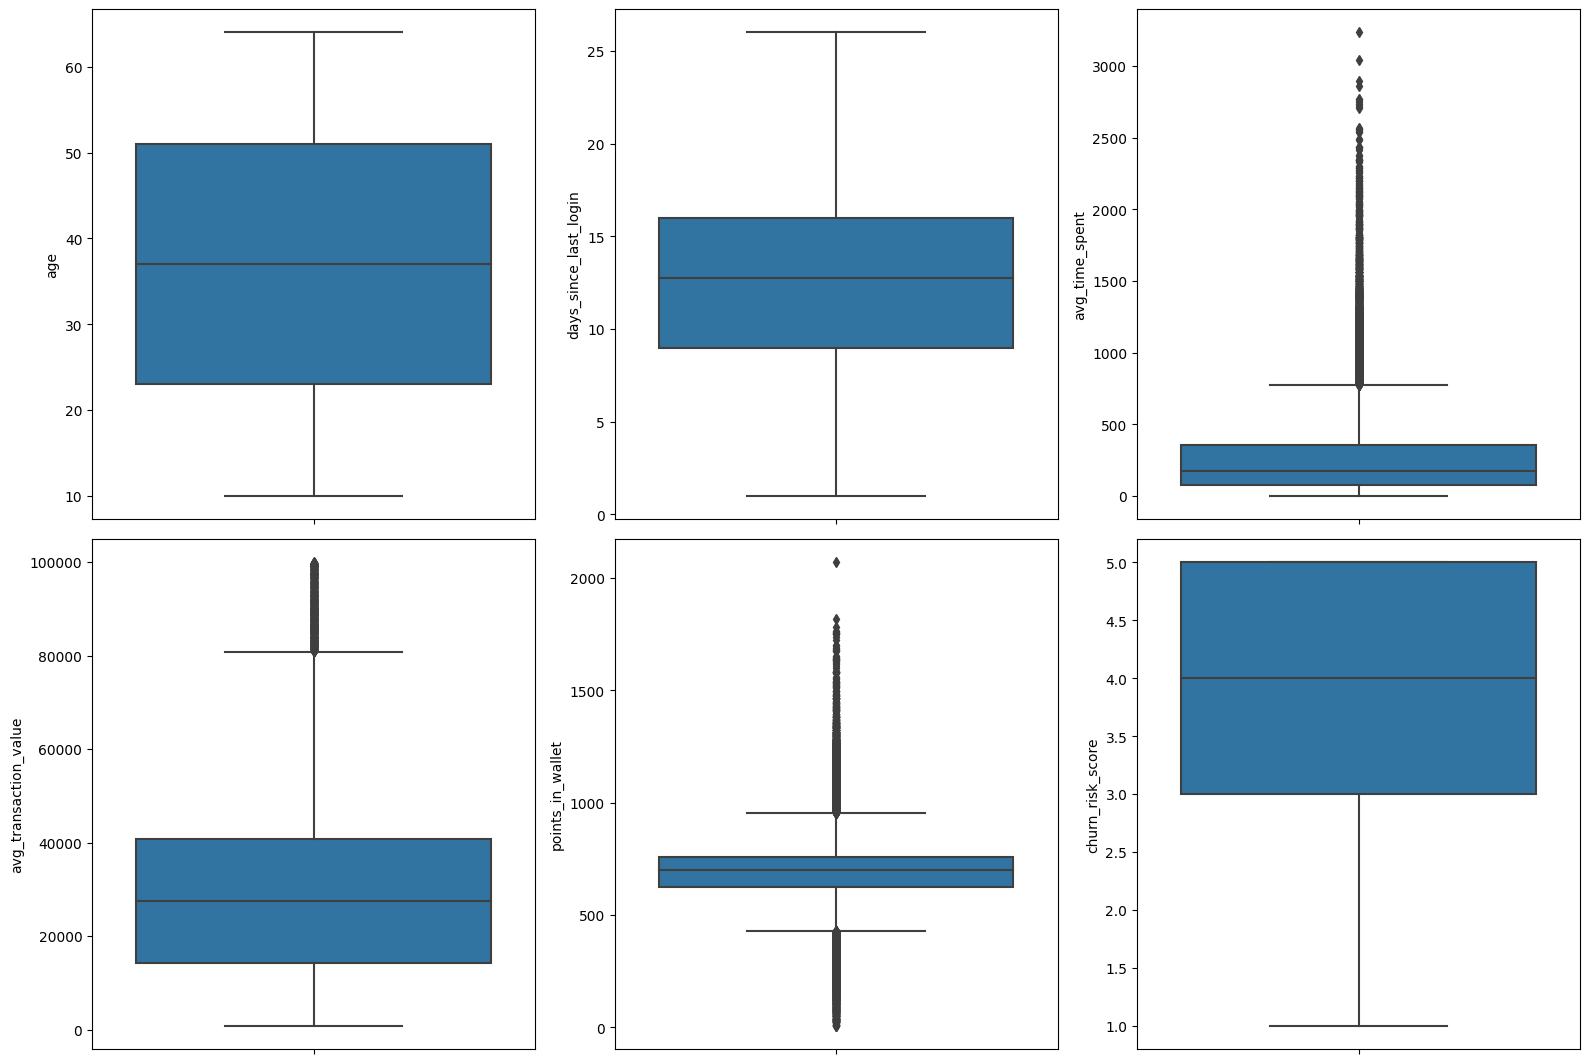

In [39]:
fig = plt.figure(figsize=(16,16))
for i in range(len(numerical_features)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=df[numerical_features[i]])
plt.tight_layout()
plt.show()

In [40]:
def replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.50 * IQR
    upper_bound = Q3 + 1.50 * IQR
    
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return data

filtered_df = df.copy()
for column in numerical_features:
    filtered_df = replace_outliers_iqr(filtered_df, column)
df= filtered_df


In [41]:
df.shape

(36992, 21)

In [42]:
df['churn_risk_score'].value_counts()

churn_risk_score
3    10424
4    10185
5     9827
1     3815
2     2741
Name: count, dtype: int64

## Feature enginerring

In [43]:
X=df.drop('churn_risk_score', axis=1).copy()
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joined
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,58082,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2146
1,32,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,45493,16.0,306.34,12838.38,10.0,698.25,Yes,No,Yes,Solved,Quality Customer Care,2135
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,82401,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,2425
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,57470,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,2438
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,56804,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,2120


In [44]:
y=df['churn_risk_score'].copy()

### One-hot Encoding

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Todo: Normalize your data
numerical_features = [feature for feature in X.columns if ((X[feature].dtypes != 'O'))]
categorical_features = [feature for feature in X.columns if ((X[feature].dtypes == 'object'))]

In [47]:
X_cat_scaled=pd.get_dummies(X[categorical_features],columns=categorical_features).astype('int')

X=pd.concat([X[numerical_features],X_cat_scaled],axis=1)
scaler=StandardScaler()
X[numerical_features]=scaler.fit_transform(X[numerical_features])

In [48]:
X.shape

(36992, 50)

In [49]:
X.head()

,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_joined,gender_F,gender_M,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-1.204886,0.591103,0.782575,0.197549,1.293096,0.066199,0.756241,-1.286093,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.322562,0.086211,0.598068,0.222367,-0.869337,-0.820491,0.070812,-1.320699,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.433715,1.566434,0.229055,1.134341,-0.428492,0.699549,-1.550904,-0.408338,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.007447,0.566558,-0.324464,-0.877590,-0.201704,-1.327171,-1.001166,-0.367439,0,1,...,1,0,0,0,1,0,0,0,0,0
4,-0.385585,0.539848,1.336094,-0.617411,-0.242399,-0.060471,-0.218053,-1.367890,1,0,...,0,0,0,0,1,0,0,0,0,0


## Train-test split

In [50]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 223
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build  model

Accuracy: 0.7213912416651649
Akurasi model SVM 72.14 %
Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.59      0.69      0.64      1160
           2       0.80      0.31      0.45       829
           3       0.87      0.90      0.88      3077
           4       0.76      0.39      0.51      3020
           5       0.64      1.00      0.78      3012

    accuracy                           0.72     11098
   macro avg       0.73      0.66      0.65     11098
weighted avg       0.74      0.72      0.70     11098

Confuction Matrix SVM 


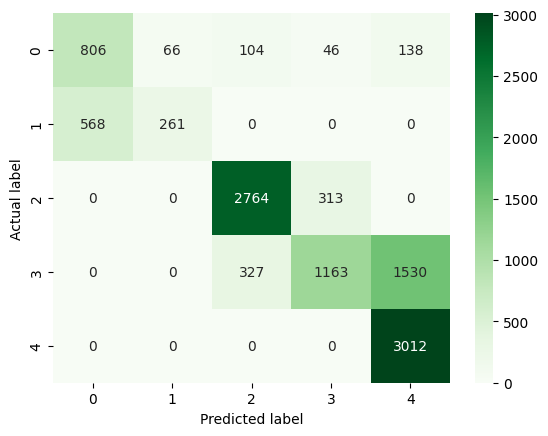

In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC(kernel= 'linear', C=1.0, gamma='scale'))

# Huấn luyện mô hình
pipeline.fit(trainX, trainY)

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = pipeline.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()


In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Xây dựng pipeline với StandardScaler và mô hình SVM
pipeline = make_pipeline(StandardScaler(), SVC())
# Tạo một dict chứa các giá trị để tinh chỉnh
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1.0, 10.0],
    'svc__gamma': ['scale', 'auto']
}

# Tạo GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Huấn luyện mô hình với tìm kiếm lưới
grid_search.fit(trainX, trainY)

# Lấy mô hình tốt nhất từ tìm kiếm lưới
best_model = grid_search.best_estimator_

# Dự đoán nhãn cho dữ liệu kiểm tra
predY = best_model.predict(testX)

# Đánh giá mô hình
accuracy = accuracy_score(testY, predY)
print('Accuracy:', accuracy)
akurasiSVM = accuracy_score(testY, predY)
print('Akurasi model SVM', "{:.2f}".format(akurasiSVM * 100),'%')
print(f"Report Metrics SVM \n {classification_report(testY, predY)}")

print(f"Confuction Matrix SVM ")
ax= plt.subplot()
sns.heatmap(confusion_matrix(testY, predY), annot=True, ax = ax, fmt = 'g', cmap='Greens')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()